In [168]:
from sklearn.neighbors import KNeighborsRegressor

In [268]:
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-6.3.0-posix-seh-rt_v5-rev1\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

In [269]:
from xgboost.sklearn import XGBRegressor

In [169]:
from sklearn.preprocessing import LabelEncoder

In [170]:
from sklearn.linear_model import LinearRegression

In [171]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [172]:
import pandas as pd
import numpy as np

In [173]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Ambar Gupta\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['grid', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [174]:
train = pd.read_csv('train_ysMSKmQ.csv')
test = pd.read_csv('test_uLBXQQR.csv')

In [175]:
train.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01/01/11,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,01/01/11,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,01/01/11,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,01/01/11,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,01/01/11,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


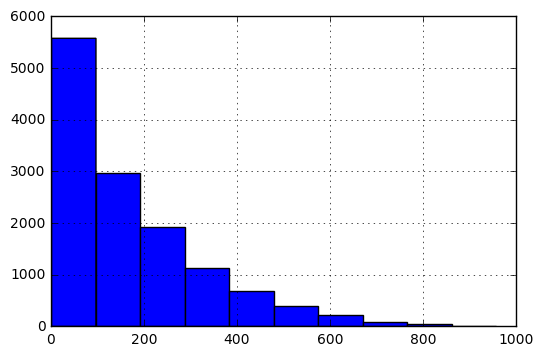

In [176]:
train['cnt'].hist()

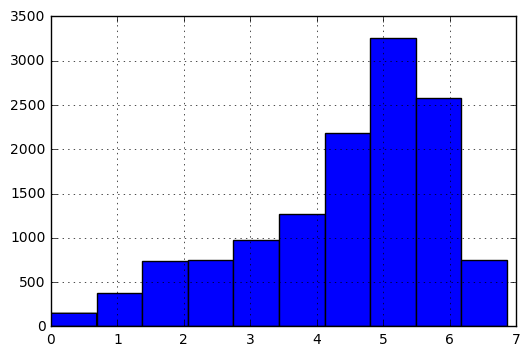

In [177]:
np.log(train.cnt).hist()

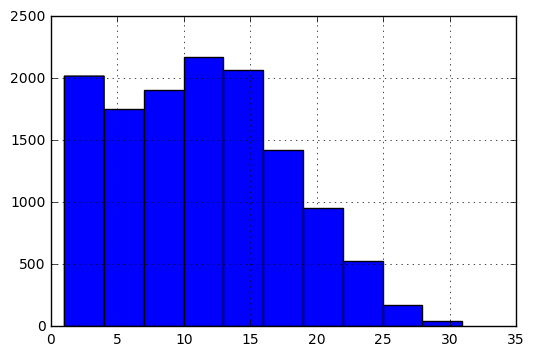

In [178]:
np.sqrt(train.cnt).hist()

In [179]:
train['cnt'] = np.sqrt(train.cnt)

In [180]:
train.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [181]:
train['season'].value_counts()

2    4409
1    3980
3    2512
4    2134
Name: season, dtype: int64

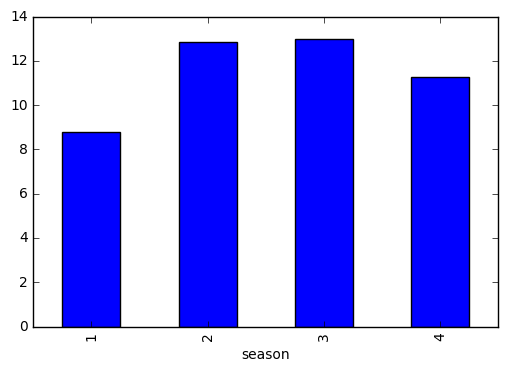

In [182]:
train.groupby('season')['cnt'].median().plot.bar()

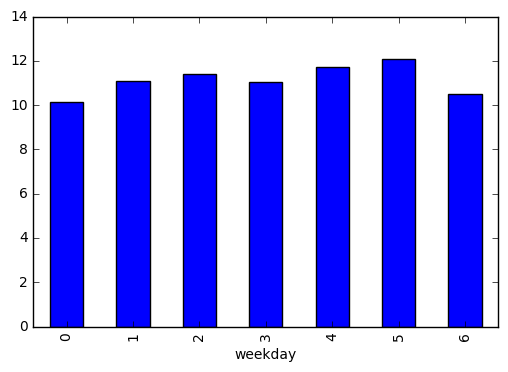

In [183]:
train.groupby('weekday')['cnt'].median().plot.bar()

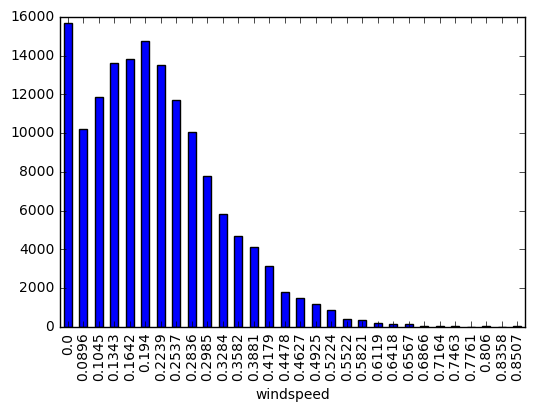

In [231]:
train.groupby('windspeed')['cnt'].sum().plot.bar()

In [236]:
train['windspeed_bin'] = pd.cut(train.windspeed,[-1.0,0.1,0.40,0.86],labels=['low','avg','high'])

In [239]:
lb_windspeed = LabelEncoder()
train['windspeed_bin'] = lb_windspeed.fit_transform(train.windspeed_bin)

In [184]:
train['weekend'] = ((train.holiday==0) & (train.workingday==0)).astype(int)

C:\Users\Ambar Gupta\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x27c21b33048>],
 'caps': [<matplotlib.lines.Line2D at 0x27c21b399b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x27c21b3eba8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x27c21b3e390>],
 'whiskers': [<matplotlib.lines.Line2D at 0x27c21b33a20>,
  <matplotlib.lines.Line2D at 0x27c21b33ba8>]}

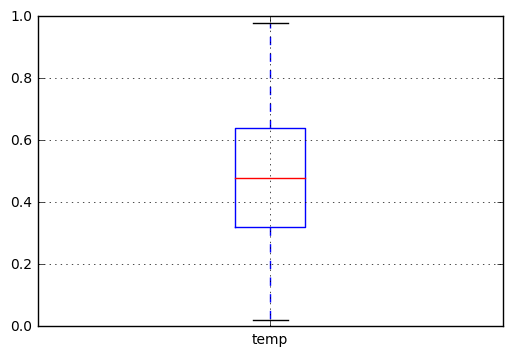

In [185]:
train.boxplot(column='temp')

In [186]:
train['temp_bin'] = pd.cut(train.temp,[0,0.3,0.7,1],labels=['low','average','high'])

In [187]:
train['temp_bin'].head()

0    low
1    low
2    low
3    low
4    low
Name: temp_bin, dtype: category
Categories (3, object): [low < average < high]

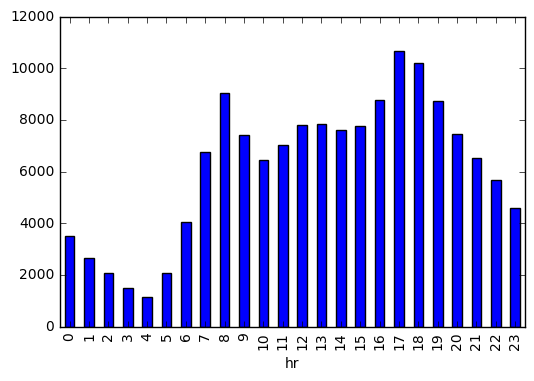

In [188]:
train.groupby('hr')['cnt'].sum().plot.bar()

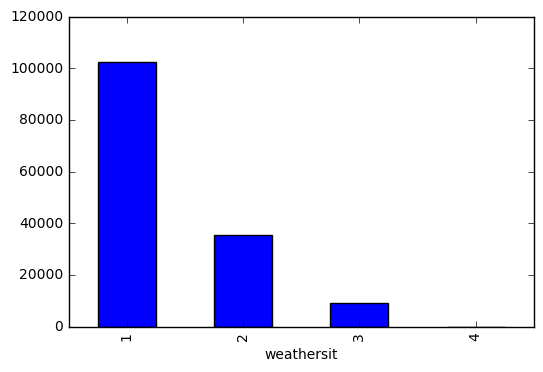

In [267]:
train.groupby('weathersit')['cnt'].sum().plot.bar()

In [189]:
train['hr_bin'] = pd.cut(train.hr,[-1,5,10,15,20,24],labels=['Late_Night', 'Office_Going', 'Mid_Day', 'Office_Returning', 'Night'])

In [190]:
train['hr_bin'].head()

0    Late_Night
1    Late_Night
2    Late_Night
3    Late_Night
4    Late_Night
Name: hr_bin, dtype: category
Categories (5, object): [Late_Night < Office_Going < Mid_Day < Office_Returning < Night]

In [191]:
lb_hr = LabelEncoder()
lb_temp = LabelEncoder()

In [192]:
train['temp_bin'] = lb_temp.fit_transform(train.temp_bin)
train['hr_bin'] = lb_hr.fit_transform(train.hr_bin)

In [193]:
train['temp_bin'].head()

0    2
1    2
2    2
3    2
4    2
Name: temp_bin, dtype: int64

In [194]:
train['hr_bin'].head()

0    0
1    0
2    0
3    0
4    0
Name: hr_bin, dtype: int64

In [195]:
df = pd.cut(train.atemp,[0,0.3,0.7,1],labels=['atemp_low','atemp_average','atemp_high'])

In [196]:
dummy = pd.get_dummies(df)

In [197]:
train = pd.concat([train,dummy],axis=1)

In [198]:
train.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'weekend', 'temp_bin', 'hr_bin', 'atemp_low', 'atemp_average',
       'atemp_high'],
      dtype='object')

In [199]:
train.corr()[((train.corr() < -0.85) | (train.corr() > 0.85)) & (train.corr() != 1)]

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,weekend,temp_bin,hr_bin,atemp_low,atemp_average,atemp_high
instant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,NaN,NaN,NaN,0.860652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mnth,NaN,0.860652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
holiday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
workingday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.93714,NaN,NaN,NaN,NaN,NaN
weathersit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.991867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [202]:
highly corelated features :-
mnth season
temp,atemp
weekend ,working day

SyntaxError: invalid syntax (<ipython-input-202-a20d2e2748d7>, line 1)

In [242]:
train.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'weekend', 'temp_bin', 'hr_bin', 'atemp_low', 'atemp_average',
       'atemp_high', 'windspeed_bin'],
      dtype='object')

In [293]:
features = ['yr','season','hr','holiday','weekday','weathersit','atemp','hum','windspeed','workingday','temp_bin','hr_bin']

In [295]:
X = train[features]
y = train.cnt

In [245]:
# temp_bin
test['temp_bin'] = pd.cut(test.temp,[0,0.3,0.7,1],labels=['low','average','high'])

# hr_bin
test['hr_bin'] = pd.cut(test.hr,[-1,5,10,15,20,24],labels=['Late_Night', 'Office_Going', 'Mid_Day', 'Office_Returning', 'Night'])

# label encode
test['temp_bin'] = lb_temp.fit_transform(test.temp_bin)
test['hr_bin'] = lb_hr.fit_transform(test.hr_bin)

# weekend
test['weekend'] = ((test.holiday==0) & (test.workingday==0)).astype(int)

In [246]:
# windspeed
test['windspeed_bin'] = pd.cut(test.windspeed,[-1.0,0.1,0.40,0.86],labels=['low','avg','high'])
test['windspeed_bin'] = lb_windspeed.fit_transform(test.windspeed_bin)

In [294]:
X_test = test[features]

In [248]:
knn = KNeighborsRegressor(n_neighbors=5,metric='l1')

In [249]:
# define the parameter values that should be searched

k_range = list(range(1,31))

# Another parameter besides k that we might vary is the weights parameters
# default options --> uniform (all points in the neighborhood are weighted equally)
# another option --> distance (weights closer neighbors more heavily than further neighbors)
# we create a list
weight_option = ['distance','uniform']

In [250]:
param_grid = dict(n_neighbors=k_range, weights=weight_option)
print(param_grid)

{'weights': ['distance', 'uniform'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [251]:
# instantiate and fit the grid
# exhaustive grid-search because it's trying every combination
# 10-fold cross-validation is being performed 30 x 2 = 60 times

grid = GridSearchCV(knn, param_grid, cv=10)
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='l1',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'weights': ['distance', 'uniform'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [252]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.8171384332022977
{'n_neighbors': 7, 'weights': 'distance'}


In [253]:
knn = KNeighborsRegressor(n_neighbors=6,weights='distance',metric='l1')

In [254]:
lin = LinearRegression()

In [255]:
dtree_reg = DecisionTreeRegressor(criterion='mse', max_depth=5)

In [270]:
xgb= XGBRegressor()

In [256]:
knn.fit(X,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='l1',
          metric_params=None, n_jobs=1, n_neighbors=6, p=2,
          weights='distance')

In [257]:
lin.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [258]:
dtree_reg.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [271]:
xgb.fit(X,y)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [296]:
# parameter testing first
param_test1 = {
 'max_depth':[3,5,7,9],
 'min_child_weight':[1,3,5]
}
gsearch1 = GridSearchCV(estimator = XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1,n_jobs=4,iid=False, cv=5)
gsearch1.fit(X,y)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.87759, std: 0.05201, params: {'min_child_weight': 1, 'max_depth': 3},
  mean: 0.87604, std: 0.05312, params: {'min_child_weight': 3, 'max_depth': 3},
  mean: 0.87920, std: 0.04995, params: {'min_child_weight': 5, 'max_depth': 3},
  mean: 0.87204, std: 0.05976, params: {'min_child_weight': 1, 'max_depth': 5},
  mean: 0.87210, std: 0.05794, params: {'min_child_weight': 3, 'max_depth': 5},
  mean: 0.87168, std: 0.05989, params: {'min_child_weight': 5, 'max_depth': 5},
  mean: 0.87443, std: 0.05527, params: {'min_child_weight': 1, 'max_depth': 7},
  mean: 0.87212, std: 0.05775, params: {'min_child_weight': 3, 'max_depth': 7},
  mean: 0.87387, std: 0.05922, params: {'min_child_weight': 5, 'max_depth': 7},
  mean: 0.87787, std: 0.04183, params: {'min_child_weight': 1, 'max_depth': 9},
  mean: 0.87663, std: 0.04850, params: {'min_child_weight': 3, 'max_depth': 9},
  mean: 0.87713, std: 0.05010, params: {'min_child_weight': 5, 'max_depth': 9}],
 {'max_depth': 3, 'min_child_weight': 5

In [297]:
param_test2 = {
 'max_depth':[2,3,4],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test2,n_jobs=4,iid=False, cv=5)
gsearch2.fit(X,y)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.87022, std: 0.04735, params: {'min_child_weight': 4, 'max_depth': 2},
  mean: 0.87100, std: 0.04597, params: {'min_child_weight': 5, 'max_depth': 2},
  mean: 0.87116, std: 0.04646, params: {'min_child_weight': 6, 'max_depth': 2},
  mean: 0.87794, std: 0.05113, params: {'min_child_weight': 4, 'max_depth': 3},
  mean: 0.87920, std: 0.04995, params: {'min_child_weight': 5, 'max_depth': 3},
  mean: 0.87685, std: 0.05111, params: {'min_child_weight': 6, 'max_depth': 3},
  mean: 0.87138, std: 0.06403, params: {'min_child_weight': 4, 'max_depth': 4},
  mean: 0.87021, std: 0.06631, params: {'min_child_weight': 5, 'max_depth': 4},
  mean: 0.87149, std: 0.05940, params: {'min_child_weight': 6, 'max_depth': 4}],
 {'max_depth': 3, 'min_child_weight': 5},
 0.8791969850288999)

In [298]:
param_test3 = {
 'gamma':[i/100.0 for i in range(0,9)]
}
gsearch3 = GridSearchCV(estimator = XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=3,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test3,n_jobs=4,iid=False, cv=5)
gsearch3.fit(X,y)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.87920, std: 0.04995, params: {'gamma': 0.0},
  mean: 0.87920, std: 0.04995, params: {'gamma': 0.01},
  mean: 0.87984, std: 0.04873, params: {'gamma': 0.02},
  mean: 0.87984, std: 0.04873, params: {'gamma': 0.03},
  mean: 0.87984, std: 0.04873, params: {'gamma': 0.04},
  mean: 0.87861, std: 0.05087, params: {'gamma': 0.05},
  mean: 0.87823, std: 0.05070, params: {'gamma': 0.06},
  mean: 0.87823, std: 0.05070, params: {'gamma': 0.07},
  mean: 0.87836, std: 0.05069, params: {'gamma': 0.08}],
 {'gamma': 0.02},
 0.8798419804868512)

In [299]:
param_test4 = {
    'n_estimators':[100,200,300,400,500,600,700,800,900,1000]
}
gsearch4 = GridSearchCV(estimator = XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=3,
 min_child_weight=5, gamma=0.02, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test4,n_jobs=4,iid=False, cv=5)
gsearch4.fit(X,y)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.80623, std: 0.05278, params: {'n_estimators': 100},
  mean: 0.86467, std: 0.05242, params: {'n_estimators': 200},
  mean: 0.87542, std: 0.04855, params: {'n_estimators': 300},
  mean: 0.87975, std: 0.04824, params: {'n_estimators': 400},
  mean: 0.88184, std: 0.04728, params: {'n_estimators': 500},
  mean: 0.88178, std: 0.04860, params: {'n_estimators': 600},
  mean: 0.88075, std: 0.04840, params: {'n_estimators': 700},
  mean: 0.88007, std: 0.04856, params: {'n_estimators': 800},
  mean: 0.87987, std: 0.04881, params: {'n_estimators': 900},
  mean: 0.87984, std: 0.04873, params: {'n_estimators': 1000}],
 {'n_estimators': 500},
 0.8818427679647147)

In [300]:
param_test5 = {
 'colsample_bylevel':[i/100.0 for i in range(85,105,5)],
 'colsample_bytree':[i/100.0 for i in range(85,105,5)]
}
gsearch5 = GridSearchCV(estimator = XGBRegressor(learning_rate =0.1, n_estimators=500, max_depth=3,
 min_child_weight=5, gamma=0.02, colsample_bylevel=1, colsample_bytree=1,
 objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test5,n_jobs=4,iid=False, cv=5)
gsearch5.fit(X,y)
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.88466, std: 0.04745, params: {'colsample_bytree': 0.85, 'colsample_bylevel': 0.85},
  mean: 0.88466, std: 0.04745, params: {'colsample_bytree': 0.9, 'colsample_bylevel': 0.85},
  mean: 0.88375, std: 0.04717, params: {'colsample_bytree': 0.95, 'colsample_bylevel': 0.85},
  mean: 0.87561, std: 0.04906, params: {'colsample_bytree': 1.0, 'colsample_bylevel': 0.85},
  mean: 0.87871, std: 0.04967, params: {'colsample_bytree': 0.85, 'colsample_bylevel': 0.9},
  mean: 0.87871, std: 0.04967, params: {'colsample_bytree': 0.9, 'colsample_bylevel': 0.9},
  mean: 0.88375, std: 0.04717, params: {'colsample_bytree': 0.95, 'colsample_bylevel': 0.9},
  mean: 0.87561, std: 0.04906, params: {'colsample_bytree': 1.0, 'colsample_bylevel': 0.9},
  mean: 0.87871, std: 0.04967, params: {'colsample_bytree': 0.85, 'colsample_bylevel': 0.95},
  mean: 0.87871, std: 0.04967, params: {'colsample_bytree': 0.9, 'colsample_bylevel': 0.95},
  mean: 0.87986, std: 0.05194, params: {'colsample_bytree': 0.95, 'co

In [301]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBRegressor(learning_rate =0.1, n_estimators=500, max_depth=3,
 min_child_weight=5, gamma=0.02, colsample_bylevel=0.85, colsample_bytree=0.85,reg_alpha=0,
 objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test6,n_jobs=4,iid=False, cv=5)
gsearch6.fit(X,y)
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

([mean: 0.88466, std: 0.04745, params: {'reg_alpha': 1e-05},
  mean: 0.88454, std: 0.04698, params: {'reg_alpha': 0.01},
  mean: 0.88410, std: 0.04856, params: {'reg_alpha': 0.1},
  mean: 0.88601, std: 0.04646, params: {'reg_alpha': 1},
  mean: 0.86430, std: 0.05930, params: {'reg_alpha': 100}],
 {'reg_alpha': 1},
 0.8860063361108341)

In [302]:
param_test7 = {
 'reg_alpha':[1,1.5,2,2.5,3]
}
gsearch7 = GridSearchCV(estimator = XGBRegressor(learning_rate =0.1, n_estimators=500, max_depth=3,
 min_child_weight=5, gamma=0.02, colsample_bylevel=0.85, colsample_bytree=0.85,reg_alpha=1,
 objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test7,n_jobs=4,iid=False, cv=5)
gsearch7.fit(X,y)
gsearch7.grid_scores_, gsearch7.best_params_, gsearch7.best_score_

([mean: 0.88601, std: 0.04646, params: {'reg_alpha': 1},
  mean: 0.88475, std: 0.05067, params: {'reg_alpha': 1.5},
  mean: 0.88595, std: 0.04649, params: {'reg_alpha': 2},
  mean: 0.88536, std: 0.04691, params: {'reg_alpha': 2.5},
  mean: 0.88402, std: 0.04721, params: {'reg_alpha': 3}],
 {'reg_alpha': 1},
 0.8860063361108341)

In [303]:
param_test8 = {
 'learning_rate':[0.05,0.1,0.01,0.2]
}
gsearch8 = GridSearchCV(estimator = XGBRegressor(learning_rate =0.1, n_estimators=500, max_depth=3,
 min_child_weight=5, gamma=0.02, colsample_bylevel=0.85, colsample_bytree=0.85,reg_alpha=1,
 objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test8,n_jobs=4,iid=False, cv=5)
gsearch8.fit(X,y)
gsearch8.grid_scores_, gsearch8.best_params_, gsearch8.best_score_

([mean: 0.87517, std: 0.05082, params: {'learning_rate': 0.05},
  mean: 0.88601, std: 0.04646, params: {'learning_rate': 0.1},
  mean: 0.71743, std: 0.07979, params: {'learning_rate': 0.01},
  mean: 0.87888, std: 0.06200, params: {'learning_rate': 0.2}],
 {'learning_rate': 0.1},
 0.8860063361108341)

In [304]:
param_test9={
    'subsample':[0.5,0.6,0.7,0.8,0.9,1.0]
}
gsearch9 = GridSearchCV(estimator = XGBRegressor(learning_rate =0.1, n_estimators=500, max_depth=3,
 min_child_weight=5, gamma=0.02, colsample_bylevel=0.85, colsample_bytree=0.85,reg_alpha=1,
 objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27,subsample=1), 
 param_grid = param_test9,n_jobs=4,iid=False, cv=5)
gsearch9.fit(X,y)
gsearch9.grid_scores_, gsearch9.best_params_, gsearch9.best_score_

([mean: 0.88355, std: 0.05438, params: {'subsample': 0.5},
  mean: 0.88326, std: 0.05612, params: {'subsample': 0.6},
  mean: 0.88556, std: 0.05289, params: {'subsample': 0.7},
  mean: 0.88362, std: 0.04914, params: {'subsample': 0.8},
  mean: 0.88422, std: 0.05150, params: {'subsample': 0.9},
  mean: 0.88601, std: 0.04646, params: {'subsample': 1.0}],
 {'subsample': 1.0},
 0.8860063361108341)

In [305]:
xgb = XGBRegressor(learning_rate =0.1, n_estimators=500, max_depth=3,
 min_child_weight=5, gamma=0.02, colsample_bylevel=0.85, colsample_bytree=0.85,reg_alpha=1,
 objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27,subsample=1)

In [306]:
xgb.fit(X,y)

XGBRegressor(base_score=0.5, colsample_bylevel=0.85, colsample_bytree=0.85,
       gamma=0.02, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=5, missing=None, n_estimators=500, nthread=4,
       objective='reg:linear', reg_alpha=1, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=1)

In [259]:
# pred = knn.predict(X_test)

In [260]:
# pred1 = lin.predict(X_test)

In [261]:
# pred2 = dtree_reg.predict(X_test)

In [307]:
pred3 = xgb.predict(X_test)

In [262]:
# pred = np.square(pred)

In [263]:
# pred1 = np.square(pred1)

In [264]:
# pred2 = np.square(pred2)

In [308]:
pred3 = np.square(pred3)

In [313]:
# create submission file
submission = pd.DataFrame(data=[], columns=['instant', 'cnt'])
submission.instant = test.instant; submission.cnt = pred3+10
submission.to_csv('submission.csv', index=False)
submission.head()

,instant,cnt
0,13036,589.028259
1,13037,347.095215
2,13038,240.079376
3,13039,243.423538
4,13040,291.042633
